In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

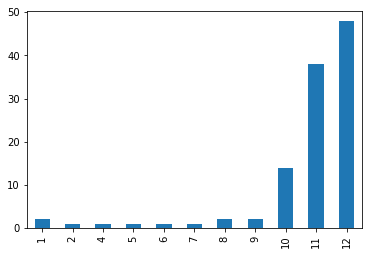

In [17]:
ch=release_dates
ch=ch[(ch.title.str.contains('Christmas')) & (ch.country=='USA')]
ch.date.dt.month.value_counts().sort_index().plot(kind='bar') #Christmas movies starts October peaks at December

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

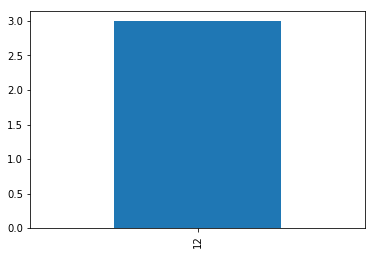

In [26]:
hob=release_dates
hob=hob[(hob.title.str.startswith('The Hobbit')) & (hob.country=='USA')]
hob.date.dt.month.value_counts().plot(kind='bar') #Hobbit movies always on December

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

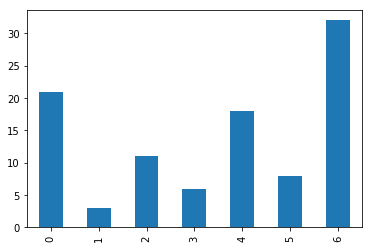

In [33]:
rom=release_dates
rom=rom[(rom.title.str.contains('Romance')) & (rom.country=='USA')]
rom.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar') #Romance movies always on Sunday>Monday

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

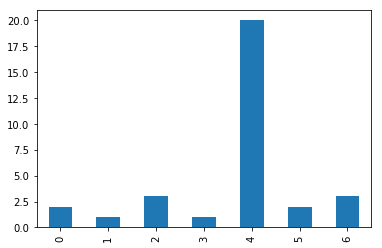

In [38]:
act=release_dates
act=act[(act.title.str.contains('Action')) & (act.country=='USA')]
act.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')  #Action movies release always on FRIDAY!

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [51]:
usa=release_dates
usa=usa[usa.country=='USA']
jud=cast
jud=jud[(jud.name=='Judi Dench') & (jud.year//10*10==1990)]
jud=jud.merge(usa).sort_values(by='date')
jud

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

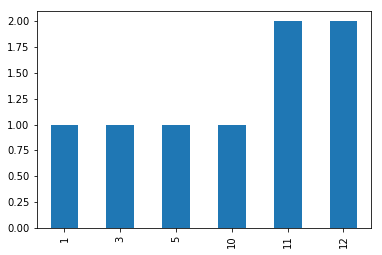

In [54]:
jud.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

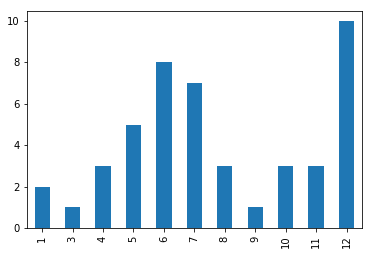

In [58]:
tom=cast[cast.name=='Tom Cruise']
tom=tom.merge(usa)
tom.date.dt.month.value_counts().sort_index().plot(kind='bar')  #Dec, June, July